导入包

In [2]:
import java.io.File
import com.lignting.neural.*
import org.jetbrains.kotlinx.multik.api.mk
import org.jetbrains.kotlinx.multik.api.ndarray
import com.github.doyaaaaaken.kotlincsv.dsl.csvReader

数据地址

In [3]:
val trainPath = "res/used_car_train_20200313.csv"
val testPath = "res/used_car_testA_20200313.csv"

使用kotlin-csv-jvm库导入csv数据

In [4]:
fun getDataFrame(path:String): AnyFrame {
    val dataMap = mutableMapOf<String, MutableList<Double?>>()
    csvReader {
        delimiter = ' '
    }.readAllWithHeader(File(path)).forEach {
        it.forEach { entry ->
            if (dataMap[entry.key] == null)
                dataMap[entry.key] = mutableListOf()
            dataMap[entry.key]!!.add(entry.value.toDoubleOrNull())
        }
    }

    return dataMap.toDataFrame()
}

In [5]:
var trainDf = getDataFrame(trainPath)
var testDf = getDataFrame(testPath)

检查各行空值数量并使用-1填充空值

In [6]:
trainDf.describe().select { name and nulls }

name,nulls
SaleID,0
name,0
regDate,0
model,1
brand,0
bodyType,4506
fuelType,8680
gearbox,5981
power,0
kilometer,0


In [7]:
trainDf = trainDf.fillNulls() { model and bodyType and fuelType and gearbox and notRepairedDamage }.with { -1.0 }
testDf = testDf.fillNulls() { model and bodyType and fuelType and gearbox and notRepairedDamage }.with { -1.0 }

In [8]:
trainDf.describe().select { name and nulls }

name,nulls
SaleID,0
name,0
regDate,0
model,0
brand,0
bodyType,0
fuelType,0
gearbox,0
power,0
kilometer,0


分析各行情况

In [9]:
trainDf.describe()

name,type,count,unique,nulls,top,freq,mean,std,min,median,max
SaleID,Double,150000,150000,0,0.000000,1,74999.500000,43301.414527,0.000000,74999.500000,149999.000000
name,Double,150000,99662,0,708.000000,282,68349.172873,61103.875095,0.000000,51638.000000,196812.000000
regDate,Double,150000,3894,0,20000008.000000,180,20034170.512180,53649.879255,19910001.000000,20030912.000000,20151212.000000
model,Double,150000,249,0,0.000000,11762,47.128700,49.536030,-1.000000,30.000000,247.000000
brand,Double,150000,40,0,0.000000,31480,8.052733,7.864956,0.000000,6.000000,39.000000
bodyType,Double,150000,9,0,0.000000,41420,1.708487,1.798313,-1.000000,1.000000,7.000000
fuelType,Double,150000,8,0,0.000000,91656,0.296227,0.621953,-1.000000,0.000000,6.000000
gearbox,Double,150000,3,0,0.000000,111623,0.176100,0.474170,-1.000000,0.000000,1.000000
power,Double,150000,566,0,0.000000,12829,119.316547,177.168419,0.000000,110.000000,19312.000000
kilometer,Double,150000,13,0,15.000000,96877,12.597160,3.919576,0.500000,15.000000,15.000000


定义离散变量和连续变量

In [10]:
val num_cols = listOf(
    "power",
    "kilometer",
    "v_0",
    "v_1",
    "v_2",
    "v_3",
    "v_4",
    "v_5",
    "v_6",
    "v_7",
    "v_8",
    "v_9",
    "v_10",
    "v_11",
    "v_12",
    "v_13",
    "v_14"
)
val cate_cols = listOf("model", "brand", "bodyType", "fuelType", "gearbox", "seller", "notRepairedDamage")

简易EDA

In [35]:
num_cols.map { col ->
    val data = trainDf[col].values.groupingBy { it }.eachCount()
    plot {
        line {
            x(data.keys, name = col)
            y(data.values, name = "price")
            color = Color.BLUE
        }
    }
}[0]

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.3.3/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="na8EGe"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"power",
"y":"price"
},
"stat":"identity",
"data":{
"price":[6374.0,12829.0,2746.0,1120.0,1207.0,2049.0,6495.0,5537.0,1081.0,637.0,9593.0,1597.0,160.0,484.0,425.0,1161.0,4457.0,2293.0,5177.0,2435.0,1041.0,4791.0,4890.0,495.0,281.0,2714.0,1725.0,5963.0,1316.0,291.0,2325.0,2064.0,1029.0,896.0,1660.0,322.0,386.0,33.0,2813.0,28.0,2956.0,158.0,740.0,702.0,245.0,57.0,723.0,573.0,2313.0,603.0,1485.0,380.0,115.0,657.0,90.0,959.0,1734.0,613.0,162.0,291.0,1751.0,80.0,224.0,1202.0,235.0,553.0,401.0,173.0,1249.0,1086.0,126.0,14.0,1.0,221.0,419.0,336.0,40.0,102.0,375.0,336.0,570.0,185.0,947.0,123.0,318.0,119.0,396.0,179.0,486.0,35.0,999.0,32.0,196.0,45.0,353.0,403.0,117.0,368.0,439.0,1231.0,41.0,68.0,377.0,586.0,413.0,83.0,380.0,16.0,392.0,90.0,1038.0,27.0,1.0,539.0,132.0,180.0,235.0,317.0,6.0,15.0,49.0,80.0,249.0,52.0,221.0,9.0,55.0,439.0,24.0,79.0,171.0,1.0,200.0,1.0,148.0,345.0,11.0,46.0,26.0,2.0,308.0,38.0,152.0,15.0,139.0,77.0,504.0,59.0,41.0,9.0,443.0,140.0,94.0,57.0,64.0,123.0,52.0,1.0,15.0,97.0,79.0,63.0,169.0,103.0,44.0,356.0,44.0,84.0,109.0,43.0,50.0,24.0,96.0,53.0,33.0,104.0,11.0,5.0,126.0,40.0,87.0,138.0,170.0,112.0,20.0,78.0,40.0,53.0,34.0,48.0,49.0,27.0,8.0,42.0,37.0,52.0,51.0,5.0,32.0,49.0,34.0,13.0,7.0,20.0,82.0,6.0,37.0,39.0,68.0,2.0,51.0,23.0,15.0,4.0,18.0,67.0,2.0,13.0,50.0,13.0,19.0,11.0,4.0,37.0,1.0,44.0,12.0,5.0,4.0,62.0,22.0,108.0,1.0,51.0,19.0,28.0,4.0,22.0,4.0,1.0,6.0,6.0,8.0,24.0,1.0,22.0,5.0,49.0,18.0,1.0,1.0,27.0,19.0,12.0,14.0,26.0,1.0,31.0,36.0,11.0,6.0,30.0,1.0,5.0,10.0,45.0,45.0,10.0,8.0,15.0,8.0,1.0,8.0,25.0,17.0,9.0,1.0,18.0,15.0,8.0,49.0,16.0,1.0,1.0,9.0,7.0,2.0,2.0,20.0,88.0,15.0,16.0,1.0,2.0,1.0,6.0,2.0,2.0,3.0,19.0,5.0,4.0,28.0,5.0,46.0,2.0,10.0,4.0,4.0,2.0,5.0,8.0,6.0,1.0,3.0,3.0,4.0,15.0,3.0,33.0,1.0,6.0,3.0,2.0,3.0,1.0,1.0,8.0,5.0,5.0,3.0,1.0,5.0,14.0,1.0,1.0,2.0,1.0,4.0,14.0,10.0,4.0,8.0,4.0,8.0,1.0,1.0,14.0,5.0,6.0,14.0,1.0,2.0,1.0,2.0,1.0,16.0,1.0,4.0,1.0,7.0,1.0,3.0,4.0,3.0,3.0,4.0,1.0,1.0,2.0,2.0,7.0,3.0,1.0,2.0,5.0,3.0,6.0,2.0,11.0,4.0,12.0,3.0,2.0,1.0,1.0,11.0,6.0,1.0,6.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,9.0,8.0,2.0,3.0,8.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,14.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,11.0,6.0,1.0,8.0,6.0,1.0,1.0,1.0,11.0,5.0,1.0,7.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,4.0,5.0,7.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
"power":[60.0,0.0,163.0,193.0,68.0,109.0,150.0,101.0,179.0,88.0,75.0,58.0,128.0,239.0,145.0,45.0,105.0,54.0,116.0,143.0,218.0,170.0,90.0,306.0,133.0,102.0,177.0,140.0,115.0,180.0,131.0,110.0,160.0,65.0,120.0,73.0,77.0,500.0,136.0,233.0,125.0,300.0,190.0,192.0,126.0,203.0,55.0,100.0,122.0,174.0,69.0,165.0,320.0,64.0,78.0,224.0,80.0,71.0,340.0,144.0,50.0,387.0,230.0,86.0,111.0,107.0,103.0,63.0,95.0,204.0,40.0,284.0,740.0,97.0,272.0,87.0,142.0,260.0,135.0,265.0,211.0,106.0,200.0,333.0,220.0,299.0,114.0,67.0,245.0,51.0,82.0,196.0,258.0,349.0,70.0,155.0,313.0,113.0,61.0,184.0,345.0,108.0,98.0,129.0,84.0,59.0,250.0,321.0,235.0,256.0,231.0,252.0,7515.0,197.0,280.0,41.0,185.0,232.0,187.0,396.0,43.0,2

In [38]:
cate_cols.map { col ->
    val data = trainDf[col].values.groupingBy { it }.eachCount()
    plot {
        line {
            x(data.keys, name = col)
            y(data.values, name = "price")
            color = Color.BLUE
        }
    }
}[0]

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.3.3/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="8OyfHa"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"model",
"y":"price"
},
"stat":"identity",
"data":{
"price":[2342.0,4502.0,927.0,386.0,543.0,412.0,3762.0,4496.0,9573.0,1460.0,6038.0,5052.0,2730.0,168.0,448.0,139.0,11762.0,4391.0,537.0,1872.0,920.0,8445.0,3827.0,811.0,508.0,3121.0,225.0,1349.0,270.0,572.0,2063.0,2195.0,96.0,464.0,965.0,395.0,1524.0,1469.0,2608.0,5186.0,1309.0,1177.0,1789.0,583.0,1696.0,1775.0,1522.0,318.0,49.0,290.0,196.0,301.0,2004.0,375.0,375.0,705.0,638.0,2454.0,337.0,349.0,201.0,1078.0,293.0,1020.0,662.0,45.0,430.0,598.0,111.0,467.0,202.0,284.0,249.0,675.0,123.0,468.0,1250.0,125.0,351.0,291.0,554.0,367.0,56.0,88.0,310.0,44.0,157.0,167.0,92.0,361.0,142.0,198.0,164.0,185.0,518.0,150.0,577.0,168.0,226.0,57.0,88.0,228.0,416.0,115.0,270.0,42.0,55.0,495.0,337.0,125.0,279.0,93.0,150.0,165.0,73.0,16.0,63.0,1084.0,344.0,205.0,171.0,85.0,287.0,372.0,62.0,170.0,227.0,101.0,142.0,296.0,265.0,62.0,126.0,112.0,238.0,64.0,588.0,312.0,143.0,147.0,199.0,193.0,325.0,121.0,261.0,68.0,199.0,289.0,26.0,218.0,91.0,28.0,169.0,77.0,182.0,171.0,120.0,17.0,52.0,286.0,566.0,10.0,250.0,162.0,161.0,87.0,109.0,148.0,55.0,76.0,17.0,95.0,134.0,185.0,55.0,144.0,89.0,43.0,48.0,47.0,98.0,168.0,151.0,109.0,325.0,86.0,61.0,141.0,102.0,125.0,51.0,237.0,144.0,164.0,129.0,126.0,142.0,149.0,13.0,200.0,52.0,35.0,260.0,7.0,345.0,106.0,164.0,102.0,122.0,2.0,65.0,60.0,95.0,68.0,23.0,37.0,56.0,68.0,59.0,146.0,135.0,30.0,52.0,4.0,14.0,67.0,3.0,49.0,103.0,89.0,47.0,74.0,50.0,26.0,18.0,11.0,23.0,16.0,38.0,18.0,2.0,20.0,10.0,10.0,1.0,7.0,2.0,2.0,1.0],
"model":[30.0,40.0,115.0,109.0,110.0,24.0,13.0,26.0,19.0,7.0,1.0,48.0,65.0,138.0,105.0,114.0,0.0,8.0,78.0,21.0,3.0,4.0,31.0,121.0,75.0,17.0,107.0,16.0,111.0,47.0,5.0,44.0,200.0,155.0,87.0,20.0,22.0,63.0,49.0,29.0,88.0,60.0,73.0,39.0,23.0,11.0,69.0,167.0,199.0,178.0,101.0,6.0,10.0,57.0,33.0,32.0,52.0,46.0,74.0,93.0,125.0,41.0,127.0,104.0,98.0,68.0,156.0,116.0,170.0,160.0,85.0,80.0,143.0,77.0,166.0,53.0,66.0,203.0,14.0,42.0,119.0,174.0,177.0,210.0,36.0,238.0,70.0,58.0,126.0,84.0,97.0,108.0,192.0,64.0,15.0,95.0,54.0,142.0,55.0,218.0,222.0,163.0,76.0,83.0,122.0,18.0,124.0,106.0,59.0,228.0,164.0,165.0,145.0,94.0,186.0,220.0,179.0,67.0,71.0,25.0,144.0,212.0,172.0,168.0,206.0,152.0,123.0,182.0,38.0,117.0,132.0,99.0,183.0,219.0,62.0,173.0,82.0,34.0,102.0,213.0,92.0,162.0,43.0,175.0,35.0,61.0,113.0,137.0,226.0,161.0,134.0,202.0,130.0,146.0,139.0,45.0,112.0,227.0,195.0,2.0,51.0,232.0,129.0,135.0,169.0,191.0,148.0,140.0,9.0,201.0,237.0,221.0,171.0,196.0,204.0,185.0,147.0,189.0,193.0,214.0,56.0,180.0,100.0,187.0,91.0,208.0,150.0,131.0,28.0,188.0,149.0,12.0,118.0,184.0,120.0,50.0,136.0,176.0,223.0,79.0,37.0,133.0,27.0,246.0,96.0,153.0,103.0,194.0,154.0,240.0,225.0,90.0,86.0,207.0,234.0,141.0,181.0,211.0,197.0,81.0,217.0,216.0,157.0,243.0,239.0,159.0,244.0,128.0,72.0,158.0,190.0,215.0,205.0,151.0,224.0,236.0,231.0,230.0,89.0,198.0,209.0,233.0,241.0,229.0,-1.0,235.0,245.0,242.0,247.0]
},
"color":"#5470c6",
"sampling":"none",
"position":"identity",
"geom":"line"
}]
};
 var plotContainer = document.getElementById("8OyfHa");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M23.31924920060519 325.5 L23.31924920060519 325.5 L25.19983381355722 15.499999999999943 L27.08041842650925 166.37492560156446 L28.961003039461282 317.9878836833602 L30.841587652413313 301.276719666695 L32.722172265

对离散变量进行标签特征编码

In [39]:
class LabelEncoding() {
    val map = mutableMapOf<Double, Double>()
    var max = 0.0
    fun get(key: Double) =
        if (map.containsKey(key))
            map[key]
        else {
            max++
            map[key] = max
            max
        }
}

In [40]:
cate_cols.forEach { colName ->
    val labelEncoding = LabelEncoding()
    val col = trainDf.getColumn(colName)
    trainDf = trainDf.sortBy { col }.update { col }.with { labelEncoding.get(it as Double) }
}

对数字变量进行归一化

In [41]:
num_cols.forEach { colName ->
    val col = trainDf.getColumn(colName)
    val min = col.minBy { it as Double } as Double
    val max = col.maxBy { it as Double } as Double
    trainDf = trainDf.update { col }.with { ((it as Double) - min) / (max - min) }
}

In [42]:
trainDf.sortBy { SaleID }

SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0.000000,736.000000,20040402.000000,223.000000,2.000000,6.000000,3.000000,1.000000,0.003107,0.827586,3.000000,1046.000000,1.000000,0.000000,20160404.000000,1850.000000,0.590596,0.711261,0.192329,0.550784,0.492084,0.807557,0.673547,0.092210,0.141901,0.437465,0.292048,0.343037,0.307346,0.323443,0.490716
1.000000,2262.000000,20030301.000000,1.000000,2.000000,4.000000,3.000000,1.000000,0.000000,1.000000,1.000000,4366.000000,1.000000,0.000000,20160309.000000,3600.000000,0.679716,0.820574,0.196059,0.505302,0.262857,0.907274,0.799128,0.096610,0.165416,0.092382,0.198266,0.314004,0.366541,0.158887,0.446701
2.000000,14874.000000,20040403.000000,142.000000,3.000000,6.000000,3.000000,1.000000,0.008440,0.827586,1.000000,2806.000000,1.000000,0.000000,20160402.000000,6222.000000,0.710518,0.785078,0.246327,0.366414,0.300847,0.861471,0.758900,0.117548,0.386669,0.121528,0.200762,0.301993,0.477060,0.217050,0.415429
3.000000,71865.000000,19960908.000000,3.000000,9.000000,6.000000,3.000000,1.000000,0.009994,1.000000,1.000000,434.000000,1.000000,0.000000,20160312.000000,2400.000000,0.697207,0.756563,0.188038,0.476285,0.190861,0.939881,0.728440,0.086811,0.207689,0.000000,0.216425,0.280760,0.389047,0.112116,0.399071
4.000000,111080.000000,20120103.000000,23.000000,11.000000,6.000000,3.000000,1.000000,0.003521,0.310345,1.000000,6977.000000,1.000000,0.000000,20160313.000000,5200.000000,0.637535,0.544686,0.214533,0.332976,0.590558,0.781377,0.483458,0.065398,0.490198,0.545516,0.337834,0.265370,0.450058,0.456712,0.557057
5.000000,137642.000000,20090602.000000,40.000000,11.000000,6.000000,2.000000,3.000000,0.005644,0.655172,3.000000,3690.000000,1.000000,0.000000,20160319.000000,8000.000000,0.726297,0.091797,0.196854,0.323871,0.359023,0.891749,0.003423,0.085298,0.565465,0.218905,0.513524,0.116349,0.515052,0.252714,0.444139
6.000000,2402.000000,19990411.000000,77.000000,6.000000,4.000000,2.000000,1.000000,0.007767,1.000000,3.000000,3073.000000,1.000000,0.000000,20160317.000000,3500.000000,0.716283,0.793895,0.195012,0.520711,0.276417,0.918311,0.777147,0.101310,0.158253,0.126462,0.198186,0.294078,0.374880,0.141017,0.423768
7.000000,165346.000000,19990706.000000,43.000000,3.000000,4.000000,2.000000,1.000000,0.005230,1.000000,3.000000,4000.000000,1.000000,0.000000,20160326.000000,1000.000000,0.540157,0.097093,0.161404,0.538112,0.436735,0.820681,0.000000,0.087508,0.247771,0.369915,0.597533,0.217957,0.317053,0.286940,0.443416
8.000000,2974.000000,20030205.000000,9.000000,2.000000,4.000000,2.000000,3.000000,0.009269,1.000000,3.000000,4679.000000,1.000000,0.000000,20160326.000000,2850.000000,0.715393,0.791097,0.210413,0.457194,0.277122,0.904038,0.769931,0.102677,0.247845,0.109466,0.197116,0.293142,0.413623,0.170100,0.435120
9.000000,82021.000000,19980101.000000,20.000000,9.000000,8.000000,2.000000,1.000000,0.004557,1.000000,3.000000,302.000000,1.000000,0.000000,20160402.000000,650.000000,0.577637,0.513260,0.096533,0.605491,0.465290,0.899378,0.450847,0.008666,0.064004,0.443146,0.375309,0.252649,0.232182,0.284427,0.363087


In [62]:
val trainData = trainDf.select(*(num_cols + cate_cols).toTypedArray())
    .rows().map {
        it.toMap().map { it.value as Double }
    } to
        trainDf["price"].toList().map { listOf(it as Double) }

In [63]:
val trainX = mk.ndarray(trainData.first)
val trainY = mk.ndarray(trainData.second)

In [64]:
val model = Model(
    Dense((num_cols + cate_cols).size, 20),
    Relu(),
    Dense(20, 12),
    Relu(),
    Dense(12, 8),
    Relu(),
    Dense(8, 4),
    Relu(),
    Dense(4, 1),
    loss = Mae(),
    optimizer = Adam()
)

In [65]:
val lossList = mutableListOf<Pair<Int, Double>>()

(1..20).forEach {
    val loss = model.fitWithBatchSize(trainX, trainY)
    lossList.add(it to loss)
}

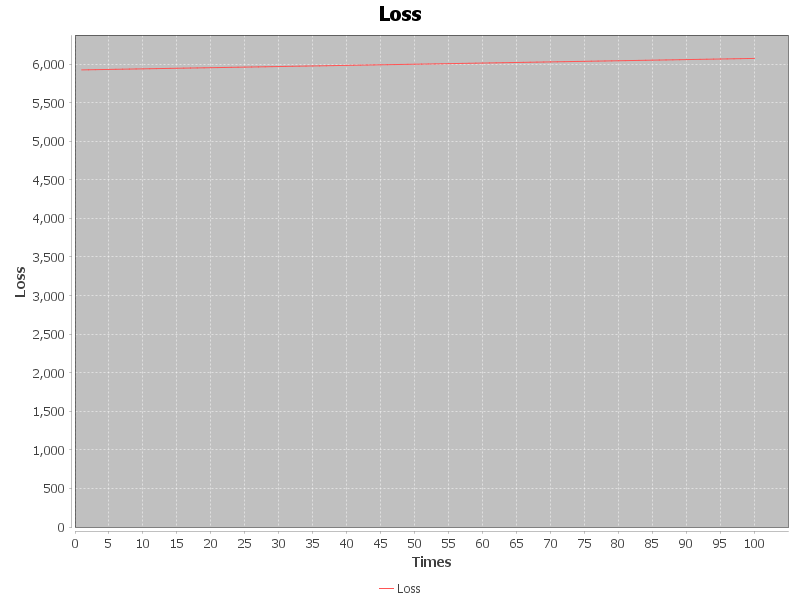

In [66]:
import org.jfree.chart.ChartFactory
import org.jfree.chart.ChartPanel
import org.jfree.chart.plot.PlotOrientation
import org.jfree.data.xy.XYSeries
import org.jfree.data.xy.XYSeriesCollection

val series = XYSeries("Loss")

lossList.forEach {
    series.add(it.first, it.second)
}
val dataSet = XYSeriesCollection()
dataSet.addSeries(series)
val chart = ChartFactory.createXYLineChart(
    "Loss", // 图表标题
    "Times", // x轴标题
    "Loss", // y轴标题
    dataSet, // 数据集
    PlotOrientation.VERTICAL, // 垂直方向
    true, // 是否包含图例
    true, // 是否生成工具提示
    false // 是否生成URL链接
)

chart.createBufferedImage(800, 600)